In [1]:
import os
import wave
import librosa
import librosa.display
import numpy as np
import pandas as pd
from pydub import AudioSegment

# Set the path to the data folder
data_dir = 'Data'

# Create a list to store features and labels
features = []
labels = []

# Let's go through each folder
for category in [ 'discomfort' , 'hungry' , 'belly_pain' , 'burping' , 'tired'  ]:
    category_path = os.path.join(data_dir, category)

    # Let's go through each file in the folder
    for filename in os.listdir(category_path):
        if filename.endswith('.wav'):
            file_path = os.path.join(category_path, filename)

            try:
                # Trying to open an audio file using the wave library
                with wave.open(file_path, 'rb') as audio_file:
                    audio_data = audio_file.readframes(-1)
                    sr = audio_file.getframerate()
                    audio = np.frombuffer(audio_data, dtype=np.int16)

                # Convert data to floating point numbers
                audio = audio.astype(np.float64)

                # Extract features from the audio file
                mfccs = librosa.feature.mfcc(y=audio, sr=sr)
                mfccs_mean = np.mean(mfccs, axis=1)

                # Add attributes and label to the corresponding lists
                features.append(mfccs_mean)
                labels.append(category)

            except Exception as e:
                #print(f"Error processing file {file_path}: {str(e)}")
                continue

# Let's create a DataFrame to store data
data = pd.DataFrame(features)
data['label'] = labels

# Save the data to a CSV file if needed
data.to_csv('child_cry_data.csv', index=False)

c:\Users\m lapan\AppData\Local\Programs\Python\Python39\lib\site-packages\pydub\utils.py:170: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work
  warn("Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work", RuntimeWarning)


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load the data from the CSV file
data = pd.read_csv('child_cry_data.csv')

# Split the data into features (X) and labels (y)
X = data.iloc[:, :-1]  # Exclude the last column (label column)
y = data['label']

# Convert labels to numerical values
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a random forest classifier
model = RandomForestClassifier()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7142857142857143


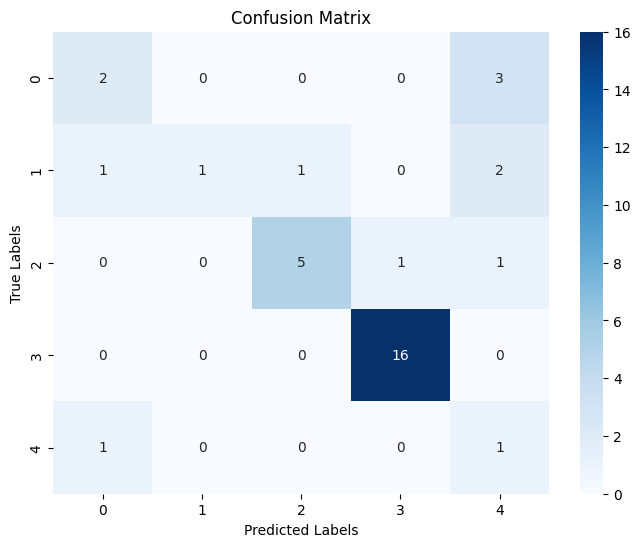

In [3]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Display confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


In [4]:
combined = pd.DataFrame(dict(actual=y_test , prediction=y_pred))

In [5]:
pd.crosstab(index=combined['actual'] , columns=combined['prediction'])

prediction,0,1,2,3,4
actual,,,,,
0,2,0,0,0,3
1,1,1,1,0,2
2,0,0,5,1,1
3,0,0,0,16,0
4,1,0,0,0,1


In [6]:
import pickle

In [7]:
pickle_out = open("new.pkl" , "wb")

In [8]:
pickle.dump(model , pickle_out)

In [9]:
pickle_out.close()